In [2]:
#collecting data

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

tickers = ["TSLA", "MSFT", "AAPL", "AMZN", "GOOG", "NVDA", "^GSPC"]
ohlcv = {}
adj_close = {}
start_date = "2015-01-01"
end_date = "2025-01-01"

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

prices_df = data['Close']
prices_df.dropna(inplace=True)

print(prices_df.head())

log_returns_df = np.log(prices_df / prices_df.shift(1))
log_returns_df.dropna(inplace=True)
 
print(log_returns_df)

[*********************100%***********************]  7 of 7 completed

Ticker           AAPL     AMZN       GOOG       MSFT      NVDA       TSLA  \
Date                                                                        
2015-01-02  24.288580  15.4260  26.014023  39.998707  0.483066  14.620667   
2015-01-05  23.604336  15.1095  25.471743  39.630875  0.474906  14.006000   
2015-01-06  23.606552  14.7645  24.881382  39.049206  0.460508  14.085333   
2015-01-07  23.937571  14.9210  24.838755  39.545326  0.459308  14.063333   
2015-01-08  24.857304  15.0230  24.917072  40.708694  0.476586  14.041333   

Ticker            ^GSPC  
Date                     
2015-01-02  2058.199951  
2015-01-05  2020.579956  
2015-01-06  2002.609985  
2015-01-07  2025.900024  
2015-01-08  2062.139893  
Ticker          AAPL      AMZN      GOOG      MSFT      NVDA      TSLA  \
Date                                                                     
2015-01-05 -0.028576 -0.020731 -0.021066 -0.009239 -0.017035 -0.042950   
2015-01-06  0.000094 -0.023098 -0.023450 -0.014786 -0.03


/var/folders/5_/t6j4c_393llc2ffbkjsdr9mr0000gn/T/ipykernel_19655/954160355.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_df.dropna(inplace=True)


In [3]:
#excess market and tickers returns

risk_free_data = yf.download("^IRX", start=start_date, end=end_date, auto_adjust=True)
risk_free_rate_raw = risk_free_data["Close"]

if isinstance(risk_free_rate_raw, pd.Series):
    risk_free_data_daily = risk_free_rate_raw / 100 / 252
else:
    risk_free_data_daily = pd.Series(0.0001/252, index=log_returns_df.index)

common_dates = log_returns_df.index.intersection(risk_free_data_daily.index)
log_returns_df_synced = log_returns_df.loc[common_dates]
risk_free_data_daily_synced = risk_free_data_daily.loc[common_dates]

excess_returns_df = log_returns_df_synced.copy()
market_excess_returns = excess_returns_df['^GSPC'] - risk_free_data_daily_synced

for col in excess_returns_df.columns:
    if col != '^GSPC':
        excess_returns_df[col] = excess_returns_df[col] - risk_free_data_daily_synced



excess_returns_df.drop(columns=['^GSPC'], inplace=True)

print('Excess returns')
print(excess_returns_df.head())
print('Market excess returns')
print(market_excess_returns.head())

[*********************100%***********************]  1 of 1 completed

Excess returns
Ticker          AAPL      AMZN      GOOG      MSFT      NVDA      TSLA
Date                                                                  
2015-01-05 -0.028576 -0.020731 -0.021066 -0.009239 -0.017035 -0.042951
2015-01-06  0.000093 -0.023098 -0.023450 -0.014786 -0.030788  0.005648
2015-01-07  0.013925  0.010544 -0.001715  0.012625 -0.002609 -0.001564
2015-01-08  0.037702  0.006812  0.003148  0.028994  0.036927 -0.001566
2015-01-09  0.001072 -0.011819 -0.013036 -0.008441  0.004020 -0.018981
Market excess returns
Date
2015-01-05   -0.018448
2015-01-06   -0.008934
2015-01-07    0.011562
2015-01-08    0.017730
2015-01-09   -0.008440
dtype: float64


CARM model
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     3195.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:05:35   Log-Likelihood:                 7576.7
No. Observations:                2515   AIC:                        -1.515e+04
Df Residuals:                    2513   BIC:                        -1.514e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.8

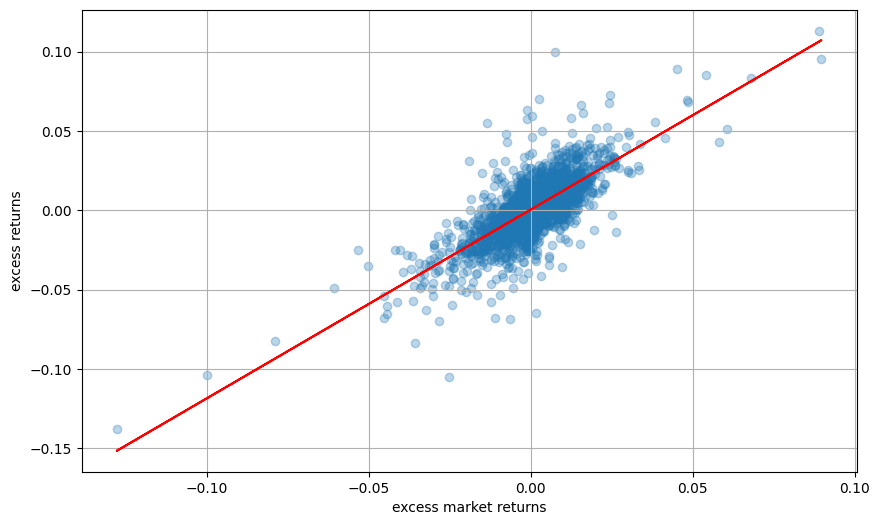

CARM model
                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     1643.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          8.16e-277
Time:                        15:05:35   Log-Likelihood:                 6832.0
No. Observations:                2515   AIC:                        -1.366e+04
Df Residuals:                    2513   BIC:                        -1.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.8

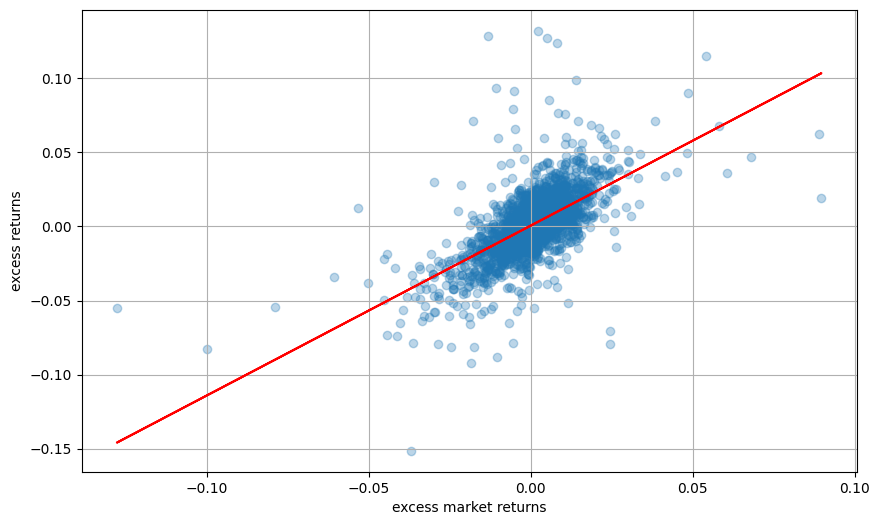

CARM model
                            OLS Regression Results                            
Dep. Variable:                   GOOG   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2699.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:05:35   Log-Likelihood:                 7464.3
No. Observations:                2515   AIC:                        -1.492e+04
Df Residuals:                    2513   BIC:                        -1.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.2

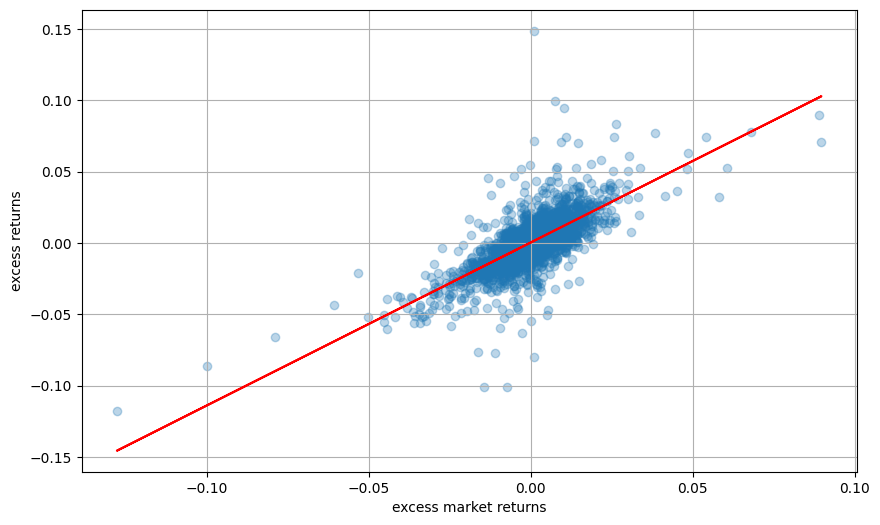

CARM model
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4456.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:05:35   Log-Likelihood:                 7948.6
No. Observations:                2515   AIC:                        -1.589e+04
Df Residuals:                    2513   BIC:                        -1.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.0

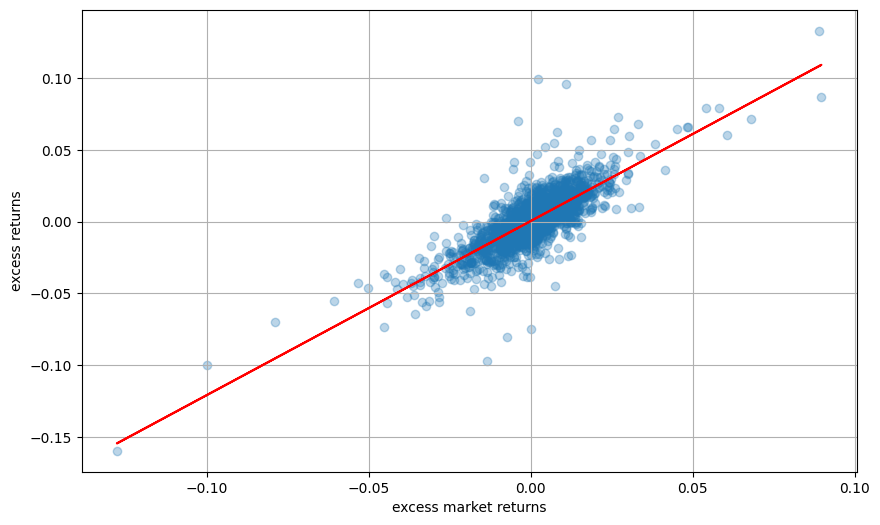

CARM model
                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     1777.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          3.46e-294
Time:                        15:05:35   Log-Likelihood:                 5892.1
No. Observations:                2515   AIC:                        -1.178e+04
Df Residuals:                    2513   BIC:                        -1.177e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.000      3.2

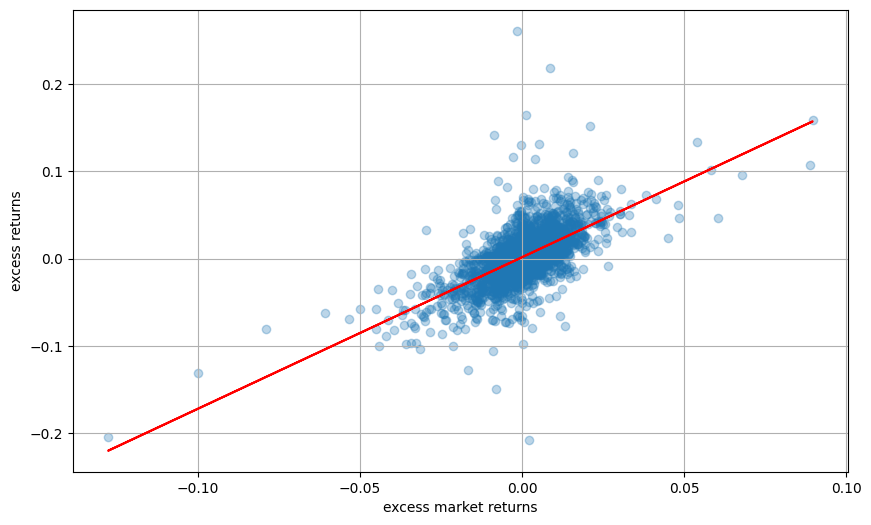

CARM model
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     719.5
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          1.34e-139
Time:                        15:05:36   Log-Likelihood:                 5115.3
No. Observations:                2515   AIC:                        -1.023e+04
Df Residuals:                    2513   BIC:                        -1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      1.0

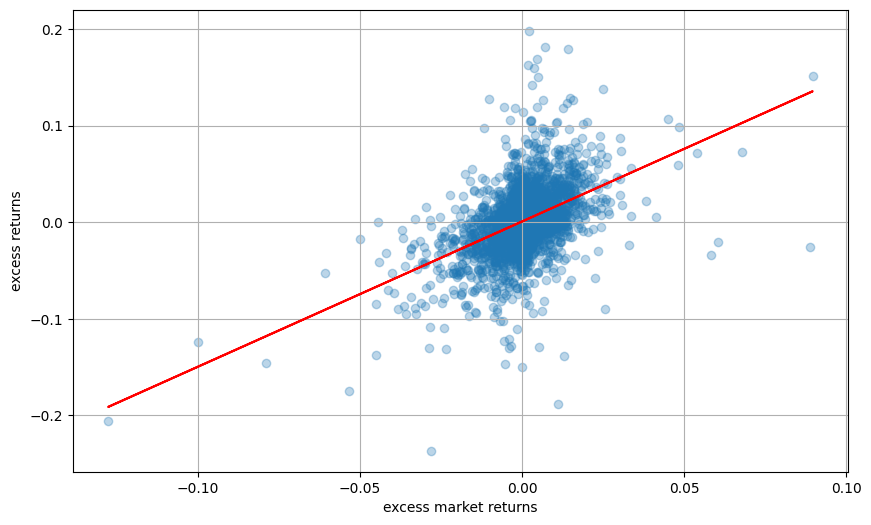

  Ticker  R-squared (CAPM)  Alpha (CAPM)  Alpha p-value (CAPM)
0   AAPL            0.5597        0.0004                0.0704
1   AMZN            0.3953        0.0006                0.0711
2   GOOG            0.5178        0.0003                0.2077
3   MSFT            0.6394        0.0004                0.0365
4   NVDA            0.4142        0.0015                0.0011
5   TSLA            0.2226        0.0007                0.2735


In [47]:
#CARM Model
capm_results_dict = {}
# Список для сбора данных для сводной таблицы CAPM
capm_summary_data = []
for stock_ticker in excess_returns_df.columns:
    Y = excess_returns_df[stock_ticker]
    X = market_excess_returns

    X = sm.add_constant(X)

    model = sm.OLS(Y, X)
    results = model.fit()
    
    capm_results_dict[stock_ticker] = results

    alpha_coef = results.params['const']
    alpha_pvalue = results.pvalues['const']

    r_squared = results.rsquared

    capm_summary_data.append({
        'Ticker': stock_ticker,
        'R-squared (CAPM)': r_squared,
        'Alpha (CAPM)': alpha_coef,
        'Alpha p-value (CAPM)': alpha_pvalue
    })

    print('CARM model')
    print(results.summary())

    plt.figure(figsize=(10, 6))
    plt.scatter(X.iloc[:, 1], Y, alpha = 0.3, label='fact')
    plt.plot(X.iloc[:, 1], results.predict(X), color='red', label='lineal regression')
    plt.xlabel('excess market returns')
    plt.ylabel('excess returns')
    plt.legend
    plt.grid(True)
    plt.show()

capm_summary_df = pd.DataFrame(capm_summary_data)
capm_summary_df = capm_summary_df.round(4)
print(capm_summary_df)

capm_summary_df.to_csv('capm_model.csv', index=False)


In [17]:
ff_factors = pd.read_csv('F-F_Research_Data_Factors_daily.csv', 
                        skiprows=5, 
                        sep=',',
                        index_col=0, 
                        na_values=-99.99,
                        engine='python',
                        skipfooter=100
                        )
ff_factors.columns = ['Mkt-RF', 'SMB', 'HML', 'RF']
ff_factors.index = pd.to_datetime(ff_factors.index, format='%Y%m%d')
ff_factors = ff_factors / 100

ff_factors.dropna(inplace=True)

model_results_dict = {}

all_dates = excess_returns_df.index.intersection(ff_factors.index)
excess_returns_synced  = excess_returns_df.loc[all_dates]
ff_factors_synced = ff_factors.loc[all_dates]

print(excess_returns_synced.columns)

for stock_ticker in excess_returns_synced.columns:
    Y = excess_returns_synced[stock_ticker]
    X = ff_factors_synced[['Mkt-RF', 'SMB', 'HML']]

    X = sm.add_constant(X)

    model = sm.OLS(Y, X)
    results = model.fit()

    model_results_dict[stock_ticker] = results

    print(f"\n--- Res of 3x factor FF model {stock_ticker} ---")
    print(results.summary())


print(' --- Res of 3x factor FF model Apple ---')
print(model_results_dict['AAPL'].summary())



Index(['AAPL', 'AMZN', 'GOOG', 'MSFT', 'NVDA', 'TSLA'], dtype='object', name='Ticker')

--- Res of 3x factor FF model AAPL ---
                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1275.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:12:34   Log-Likelihood:                 7709.1
No. Observations:                2515   AIC:                        -1.541e+04
Df Residuals:                    2511   BIC:                        -1.539e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

In [12]:
print(' --- Res of 3x factor FF model Tesla ---')
print(model_results_dict['TSLA'].summary())

 --- Res of 3x factor FF model Tesla ---
                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     337.0
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          6.86e-184
Time:                        14:11:12   Log-Likelihood:                 5224.1
No. Observations:                2515   AIC:                        -1.044e+04
Df Residuals:                    2511   BIC:                        -1.042e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [ ]:
print(' --- Res of 3x factor FF model Microsoft ---')
print(model_results_dict['MSFT'].summary())

 --- Res of 3x factor FF model Microsoft ---
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     2089.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:                 8239.7
No. Observations:                2515   AIC:                        -1.647e+04
Df Residuals:                    2511   BIC:                        -1.645e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

In [14]:
print(' --- Res of 3x factor FF model Amazon ---')
print(model_results_dict['AMZN'].summary())

 --- Res of 3x factor FF model Amazon ---
                            OLS Regression Results                            
Dep. Variable:                   AMZN   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     892.4
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:12:06   Log-Likelihood:                 7112.1
No. Observations:                2515   AIC:                        -1.422e+04
Df Residuals:                    2511   BIC:                        -1.419e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [15]:
print(' --- Res of 3x factor FF model Google ---')
print(model_results_dict['GOOG'].summary())

 --- Res of 3x factor FF model Google ---
                            OLS Regression Results                            
Dep. Variable:                   GOOG   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1080.
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:12:16   Log-Likelihood:                 7589.1
No. Observations:                2515   AIC:                        -1.517e+04
Df Residuals:                    2511   BIC:                        -1.515e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [33]:
print(' --- Res of 3x factor FF model Nvidia ---')
print(model_results_dict['NVDA'].summary())

 --- Res of 3x factor FF model Nvidia ---
                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     853.4
Date:                Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:23:01   Log-Likelihood:                 6103.4
No. Observations:                2515   AIC:                        -1.220e+04
Df Residuals:                    2511   BIC:                        -1.218e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

In [ ]:
import pandas as pd
import statsmodels.api as sm

summary_data = []

for ticker, results in model_results_dict.items():
    alpha_coef = results.params['const']
    alpha_pvalue = results.pvalues['const']
    
    mkt_beta = results.params['Mkt-RF']
    mkt_pvalue = results.pvalues['Mkt-RF']
    
    smb_beta = results.params['SMB']
    smb_pvalue = results.pvalues['SMB']
    
    hml_beta = results.params['HML']
    hml_pvalue = results.pvalues['HML']
    
    r_squared = results.rsquared
    
    summary_data.append({
        'Ticker': ticker,
        'R-squared': r_squared,
        'Alpha (const)': alpha_coef,
        'Alpha p-value': alpha_pvalue,
        'Mkt-RF Beta': mkt_beta,
        'Mkt-RF p-value': mkt_pvalue,
        'SMB Beta': smb_beta,
        'SMB p-value': smb_pvalue,
        'HML Beta': hml_beta,
        'HML p-value': hml_pvalue
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(4)
print("\n--- 3x factor model ---")
print(summary_df)


summary_df.to_csv('3x_factor_model_summary.csv', index=False)




--- 3x factor model ---
  Ticker  R-squared  Alpha (const)  Alpha p-value  Mkt-RF Beta  \
0   AAPL     0.6037         0.0003         0.1787       1.1734   
1   AMZN     0.5160         0.0004         0.1357       1.1274   
2   GOOG     0.5634         0.0002         0.4179       1.1264   
3   MSFT     0.7139         0.0003         0.1228       1.2052   
4   NVDA     0.5049         0.0013         0.0018       1.6787   
5   TSLA     0.2871         0.0006         0.3324       1.4364   

   Mkt-RF p-value  SMB Beta  SMB p-value  HML Beta  HML p-value  
0             0.0   -0.2974       0.0000   -0.3997          0.0  
1             0.0   -0.2019       0.0000   -0.7406          0.0  
2             0.0   -0.2585       0.0000   -0.4051          0.0  
3             0.0   -0.4370       0.0000   -0.4630          0.0  
4             0.0    0.0149       0.8227   -0.9364          0.0  
5             0.0    0.5726       0.0000   -0.7276          0.0  

---  CAPM model ---
  Ticker  R-squared (CAPM)  A